In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
weather_data = pd.read_csv('weather.csv')
bin_size = pd.read_csv('BinSize.csv')
temp_data = pd.read_csv('temperature.csv')

In [3]:
weather_data.head(4)

,Year,Fires,Acres
0,2019,50 477,4 664 364
1,2018,58 083,8 767 492
2,2017,71 499,10 026 086
3,2016,67 743,5 509 995


In [4]:
bin_size.head(2)

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...


In [5]:
temp_data.head(3)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278


In [6]:
temp_data.Date = pd.to_datetime(temp_data.Date, format='%Y-%m-%d')

In [7]:
x = temp_data[temp_data.Date.apply(lambda x: x.year>=2005 and x.year<2014)].groupby\
            (pd.Grouper(key='Date', freq='D')).apply(lambda x: x.loc[(x.Data_Value==x.Data_Value.max())]).drop_duplicates(subset=['Date']).reset_index(drop=True)

y = temp_data[temp_data.Date.apply(lambda x: x.year>=2005 and x.year<2014)].groupby\
            (pd.Grouper(key='Date', freq='D')).apply(lambda x: x.loc[(x.Data_Value==x.Data_Value.min())]).drop_duplicates(subset=['Date']).reset_index(drop=True)

In [8]:
x.head(2)

,ID,Date,Element,Data_Value
0,USC00205451,2005-01-01,TMAX,156
1,USC00207320,2005-01-02,TMAX,139


In [9]:
y.head(2)

,ID,Date,Element,Data_Value
0,USW00094889,2005-01-01,TMIN,-56
1,USC00205450,2005-01-02,TMIN,-56


### line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

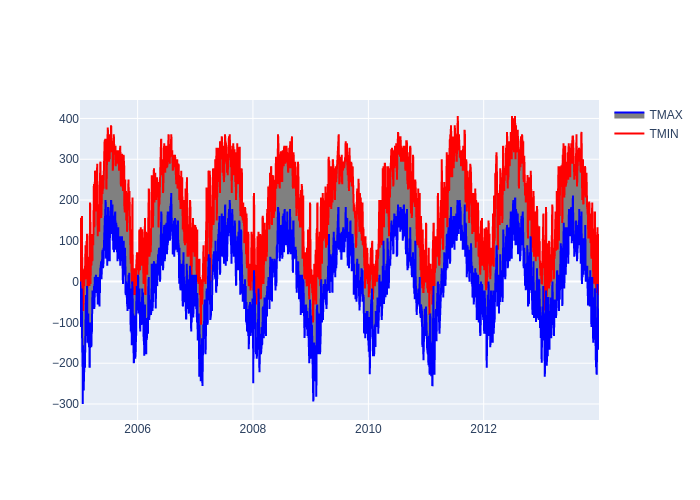

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x.Date,
    y=x.Data_Value,
    name = 'TMIN',
    line_color='rgb(255,0,0)',
))
fig.add_trace(go.Scatter(
    x=y.Date,
    y=y.Data_Value,
    name='TMAX',
    fill='tonexty',
    fillcolor='rgb(128, 128, 128)',
    line_color='rgb(0,0,255)',
))

fig.show('png')

In [11]:
print(temp_data.Data_Value.max())
print(temp_data.Data_Value.min())

406
-343


In [12]:
tmax_2005_14 = temp_data[temp_data.Date.apply(lambda x: x.month!=2 and x.day!=29)].loc[(temp_data.Date>='2005-1-1') & (temp_data.Date<'2014-12-31')].Data_Value.max()
tmin_2005_14 = temp_data[temp_data.Date.apply(lambda x: x.month!=2 and x.day!=29)].loc[(temp_data.Date>='2005-1-1') & (temp_data.Date<'2014-12-31')].Data_Value.min()
print(tmax_2005_14)
print(tmin_2005_14)

406
-306


In [13]:

a = temp_data.loc[(temp_data.Date>='2015-1-1') & (temp_data.Date<'2016-1-1') & (temp_data.Data_Value>tmax_2005_14) \
                 | (temp_data.Data_Value<tmin_2005_14)]
a

,ID,Date,Element,Data_Value
127333,USC00208972,2015-02-21,TMIN,-322
128105,USC00203712,2015-02-21,TMIN,-322
137824,USC00208972,2015-02-20,TMIN,-322
140515,USC00201502,2015-02-20,TMIN,-317
141374,USW00094889,2015-02-20,TMIN,-343


### Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

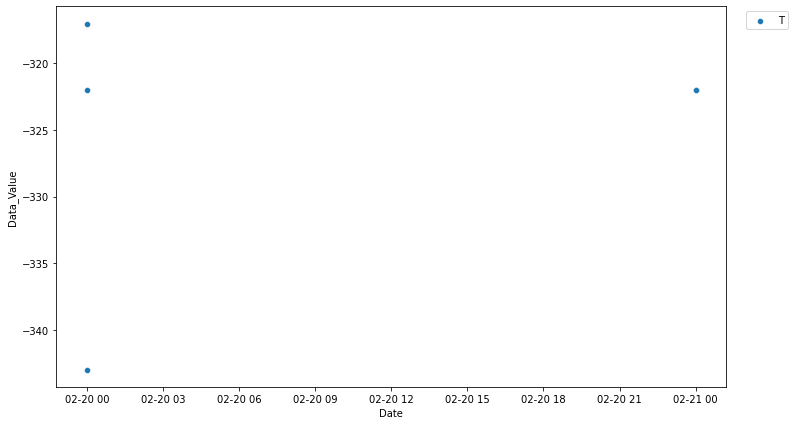

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=a.Date, y=a.Data_Value)
plt.legend('Temp value', bbox_to_anchor=(1.1,1))

### Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

Text(0.5, 6.79999999999999, 'Temp Data value')

<Figure size 864x504 with 0 Axes>

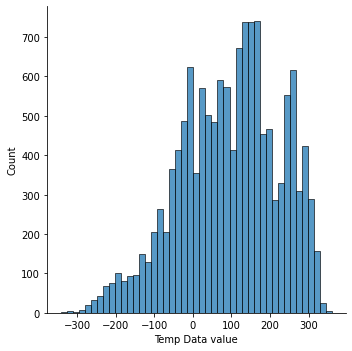

In [15]:
x = temp_data[temp_data.Date.apply(lambda x: x.year==2015)]
plt.figure(figsize=(12,7))
sns.displot(x.Data_Value)
plt.xlabel('Temp Data value')

### Identify the correlation between fires and acres.

In [16]:
weather_data.Acres = weather_data.Acres.apply(lambda x: int(x.encode("ascii", "ignore").decode()))
weather_data.Fires = weather_data.Fires.apply(lambda x: int(x.encode("ascii", "ignore").decode()))

In [17]:
print('Correlation between Fires and Acers :', weather_data.Acres.corr(weather_data.Fires))

Correlation between Fires and Acers : 0.5296336923555135


### Compute moving averages for 5years of fires and acres.

In [18]:
weather_data['MA_Acres'] = weather_data.Acres.rolling(window=5).mean()
weather_data['MA_fire'] = weather_data.Fires.rolling(window=5).mean()
weather_data

,Year,Fires,Acres,MA_Acres,MA_fire
0,2019,50477,4664364,NaN,NaN
1,2018,58083,8767492,NaN,NaN
2,2017,71499,10026086,NaN,NaN
3,2016,67743,5509995,NaN,NaN
4,2015,68151,10125149,7818617.2,63190.6
...,...,...,...,...,...
89,1930,190980,52266000,46329400.0,169595.6
90,1929,134895,46230000,47211200.0,164042.0
91,1928,175934,43542000,47141600.0,171084.4
92,1927,158438,38531000,46435200.0,169492.2


### Develop the relation plot for Number of Fires and Acres Burned in US in years 1987 to 2019.

<AxesSubplot:xlabel='Acres', ylabel='Fires'>

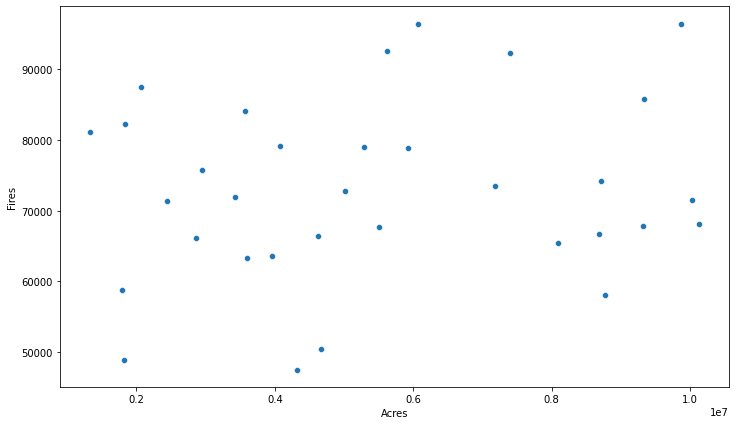

In [19]:
x = weather_data[(weather_data.Year>=1987) & (weather_data.Year<2020)]
plt.figure(figsize=(12,7))
sns.scatterplot(x=x.Acres, y=x.Fires)